In [14]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from random import randint, random , uniform

In [15]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:])
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))#---
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [16]:
def inicializar_zeros(dimension):
    w = np.random.randn(dimension , 1)*0.01 #ALEATORIO
    b = 1
    assert(w.shape == (dimension,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return w ,b

In [17]:
def sigmoide(self):
    return 1 / (1 + np.exp(-self))


In [18]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoide(np.dot(w.T, X) + b)
    cost = (-1/m)*np.sum((Y*np.log(A)+ (1-Y)*np.log(1-A)), axis = 1)
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {
        "dw": dw,
        "db": db
    }
    return grads, cost

In [19]:
def optimizar(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 5000 == 0:
            print ("Costo despues de iteracion %i: %f" %(i, cost))
    params = {
        "w": w,
        "b": b
    }
    grads = {
        "dw": dw,
        "db": db
    }
    return params, grads, costs

In [20]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Calcule el vector &quot;A&quot; que predice las probabilidades de que un gato esté presente en la imagen
    A = sigmoide(np.dot(w.T, X)+b)
    #return A
    
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        # Convierte la probabilidad A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ###
        if (A[0][i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
        #pass
        ### END CODE HERE ###
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [21]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost =False):
    
    w, b = inicializar_zeros(X_train.shape[0])
    parameters, grads, costs = optimizar(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
   
    d = {
        "costs": costs, 
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train" : Y_prediction_train, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learning_rate, 
        "num_iterations": num_iterations
    }
    return d

In [22]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [23]:
train_set_x_orig_flatten = train_set_x_orig.reshape (train_set_x_orig.shape [0], -1).T 
test_set_x_orig_flatten = test_set_x_orig.reshape (test_set_x_orig.shape [0], -1).T 

In [24]:
train_set_x = train_set_x_orig_flatten/255
test_set_x = test_set_x_orig_flatten/255

In [31]:
learning_rates = [0.03, 0.003, 0.0003]

learning rate is: 0.03
train accuracy: 100.0 %
test accuracy: 70.0 %
learning rate is: 0.003
train accuracy: 100.0 %
test accuracy: 70.0 %
learning rate is: 0.0003
train accuracy: 93.30143540669856 %
test accuracy: 70.0 %

-------------------------------------------------------



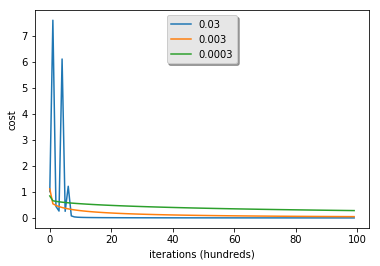

In [32]:
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 10000,
learning_rate = i, print_cost = False)
print ('\n' + "-------------------------------------------------------" + '\n')
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()